Kaggle Install & Imporing Kaggle Key


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

In [ ]:
!unzip spaceship-titanic.zip

# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

 # Scrolling Table for viewing DataFrame (Not-Imp) but Handy

In [ ]:
# SuperHandy
def display_scrollable_dataframe(df):
    html = f'<div style="height: 300px; overflow-y: scroll;">'
    html += df.to_html()
    html += '</div>'
    display(HTML(html))

# Import Data & Read

In [ ]:
df = pd.read_csv('train.csv') # loading in the data

# Jo's Note:
  - PreProcessing function to Transform the DataSet
  - Handle Missing Value each columns
  - Have to Check on High Cardinality columns
  - Target Varibale: Transported
  - [C] -> Categorical
  - [N] -> Numerical
  - Dropped Name, PassengerID columns
  - Made a preprocessing fn and checked it with df1 which is a copy of org df & Verified df which is currently Preprocessed & Results Below
  - Tested and verified the preprocessing with df1
  - Info about old & new dataset updated
  - df is DONE
  - Raedy for modeling
  
 


In [ ]:
df.info() # info about the dataset before PreProcessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Analytical Base Table (ABT)

In [ ]:
PreProcessing(df) # Orginal Dataset after Preposseing going through the preProcessing fn i craeted
display_scrollable_dataframe(df)

In [ ]:
df.info() # Info about the Original Data After prepossesing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_deck    8693 non-null   object 
 12  Cabin_Side    8693 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


# Making a Pipeline for E-D-A

In [ ]:
# Creating a PreProcessing Function
def PreProcessing(df):
  # PassengerId col -> Dropped # confirmed with df1
  df.drop('PassengerId', axis = 1, inplace = True)
  # HomePlanet -> [C]
  df['HomePlanet'].fillna('missing1', inplace = True) # filling the NuN columns with 'missing' # confirmed with df1
  # cryoSleep -> 217 Missing Values
  df['CryoSleep'].fillna('missing2', inplace = True) # confirmed with df1
  # Cabin Column - > Splitting and storing into new Column & Dropping Cabin col
  df['Cabin_deck']= df['Cabin'].apply(lambda x: str(x).split('/')[0]) # Extracring Deck from Cabin col and storing into New col # confirmed with df1
  df['Cabin_Side'] = df['Cabin'].apply(lambda x: str (x).split('/')[-1]) # Extracting Side from Cabin col and Storing into New col # confirmed with df1
  df.drop('Cabin', axis = 1, inplace = True) # confirmed with df1
  # Destination column -> filling Null Values & maybe seperate feautures or will one hot encode it
  df['Destination'].fillna('missing3', inplace = True) # Filling the missing value with 'missing
  # df['Trappist_Destination'] = df['Destination'].apply(lambda x: 'TRAPPIST' if 'TRAPPIST-1e' in x else '') # Extarcting into a new col # confirmed with df1
  # df['Pso_Destination'] = df['Destination'].apply(lambda x: 'PSO' if 'PSO J318.5-22' in x else '') # Extarcting into a new col # confirmed with df1
  # df['Cancri_Destination'] = df['Destination'].apply(lambda x: 'Cancri' if '55 Cancri e' in x else '') # Extarcting into a new col # confirmed with df1
  # df.drop('Destination', axis = 1, inplace = True) # Dropping Destination col # confirmed
  # Age Column -> filling the Null values with Mean(29)
  df['Age'].fillna(29, inplace=True) # Confimed with df1
  #VIP Col -> Will Check later - > Bool Type
  df['VIP'].fillna('missing4', inplace = True) # Confimed with df1
  #'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' filling it with 0
  df['RoomService'].fillna(0, inplace = True) # Confimed with df1
  df['FoodCourt'].fillna(0, inplace = True) # Confimed with df1
  df['ShoppingMall'].fillna(0, inplace = True) # Confimed with df1
  df['Spa'].fillna(0, inplace = True) # Confimed with df1
  df['VRDeck'].fillna(0, inplace = True) # Confimed with df1
  # Name col -> Dropping , Doesn't see any insights from it also because of high Cardinality
  df.drop("Name", axis =1, inplace = True) # Confimed with df1

In [ ]:
abt = df.copy() # Deep Copy of df to send into Modeling

# Model Building

- use 'abt' aka deep copy of PreProcessed df
- Feauture & Target value - X, y
- One Hot Encode any categorical features
- Tarin,  hold out Split
- Train on different algo's

In [ ]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Cabin_deck    8693 non-null   object 
 12  Cabin_Side    8693 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [ ]:
# A fn to Check the unqiue features of Categorical Variables to Confirm
def object_features(df):
    columns = df.select_dtypes(include='object').columns
    
    for col in columns:
        unique_values = df[col].nunique()
        values = df[col].unique()
        
        print(f"Column: {col}")
        print(f"Number of unique values: {unique_values}")
        print("Unique values:")
        print(values)
        print("\n")


object_features(abt)

Column: HomePlanet
Number of unique values: 4
Unique values:
['Europa' 'Earth' 'Mars' 'missing1']


Column: CryoSleep
Number of unique values: 3
Unique values:
[False True 'missing2']


Column: Destination
Number of unique values: 4
Unique values:
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'missing3']


Column: VIP
Number of unique values: 3
Unique values:
[False True 'missing4']


Column: Cabin_deck
Number of unique values: 9
Unique values:
['B' 'F' 'A' 'G' 'nan' 'E' 'D' 'C' 'T']


Column: Cabin_Side
Number of unique values: 3
Unique values:
['P' 'S' 'nan']




# Model Dependencies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# X, y 

# Droping Identifier Columns 
X = abt.drop('Transported', axis = 1)

# One hot Encode the Categorical Features a.k.a unqiue col's
X = pd.get_dummies(X)

# Create target Col
y = abt['Transported']

###### After One Hot Encoding the Categorical features: 32 Columns in 'X'

In [ ]:
len(X.columns)

32

# Train Test Split

In [ ]:
# Splitting into Train & test particions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

##### Length of DataSet after Train-Test Particion

In [ ]:
X.shape # Just Checking

(8693, 32)

In [ ]:
y.shape # Just Checking

(8693,)

In [ ]:
len(X_train) # X_train

6085

In [ ]:
len(X_test) # X_test

2608

In [ ]:
len(y_train) # y_train

6085

In [ ]:
len(y_test) # y_test

2608

# Prepocessing & Pipelines

In [ ]:
# importing algos for our Classification Task

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier, Lasso

In [ ]:
# Create a dictionary of pipelines for our task
pipelines = {
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RidgeClassifier())
    ])
}


In [ ]:
# importing GridSearchCV for hyperparameter tuning and for Cross Validation
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a dictionary of parameter grids for hyperparameter tuning
param_grids = {  

    'XGBoost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5]
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 4, 5]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Ridge Regression': {
        'classifier__alpha': [0.1, 1, 10]
    }
}

In [ ]:
# A blank dictionary to hold the models after cross-validation
fit_models = {}

# A loop to go through both dictionaries
for algo, pipeline in pipelines.items():
    print(f"Training the {algo} model")
    model = GridSearchCV(pipeline, param_grids[algo], n_jobs=-1, cv=10)
    # Train the model using the algorithm
    model.fit(X_train, y_train)
    # Storing model results in the dictionary
    fit_models[algo] = model

Training the XGBoost model
Training the Random Forest model
Training the Decision Tree model
Training the Support Vector Machine model
Training the K-Nearest Neighbors model
Training the Ridge Regression model


# Prediction Scores

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Evaluate and Performance of the Model
for algo, model in fit_models.items():
    yhat = model.predict(X_test)  # Model Predict X_test col
    accuracy = accuracy_score(y_test, yhat)  # Accuracy Score
    precision = precision_score(y_test, yhat)  # Precision Score
    recall = recall_score(y_test, yhat)  # Recall Score
    print(f"Metrics for {algo}: accuracy = {accuracy}, precision = {precision}, recall = {recall}")  # Printing scores of each algo


Metrics for XGBoost: accuracy = 0.8059815950920245, precision = 0.7837643678160919, recall = 0.841820987654321
Metrics for Random Forest: accuracy = 0.7599693251533742, precision = 0.7959363957597173, recall = 0.6952160493827161
Metrics for Decision Tree: accuracy = 0.7687883435582822, precision = 0.7774219375500401, recall = 0.7492283950617284
Metrics for Support Vector Machine: accuracy = 0.7829754601226994, precision = 0.77526395173454, recall = 0.7932098765432098
Metrics for K-Nearest Neighbors: accuracy = 0.758819018404908, precision = 0.7623918174665618, recall = 0.7476851851851852
Metrics for Ridge Regression: accuracy = 0.7756901840490797, precision = 0.816, recall = 0.7083333333333334


# Save & Laod and Model

In [ ]:
# SAVING
import pickle # importing pickle to save & load the model

with open('gboosted.pkl', 'wb') as f:
  pickle.dump(fit_models['XGBoost'], f)

In [ ]:
# LOADING
with open('gboosted.pkl', 'rb') as f:
  reloaded_model = pickle.load(f)
  # model loaded into 'reloaded_model' var

# Predict on Test Data

In [ ]:
test_df = pd.read_csv('test.csv') # Reading in TestData

In [ ]:
abt_test = test_df.copy() # Deep copy of test_df

In [ ]:
PreProcessing(abt_test) # Preprocessing Test csv file to predict

In [ ]:
abt_test.shape # Veryfing

(4277, 12)

In [ ]:
abt_test.columns.shape # Shape after Preprocessing

(12,)

In [ ]:
X.columns.shape # Tarin model's col shape

(32,)

In [ ]:
# Aim: have to make it abt_test.columns = 32
abt.columns.shape 

(13,)

##  PreProcessing Test_data after PrePocessing function call


In [ ]:
# X, y 

# Droping Identifier Columns from test data
# abt_test = abt_test.drop('Transported', axis = 1)

# One hot Encode the Categorical Features a.k.a unqiue col's from test data
abt_test = pd.get_dummies(abt_test)

# Create target Col from test data
# y = abt_test['Transported']

In [ ]:
abt_test.columns.shape 

(32,)

In [ ]:
y_hat = reloaded_model.predict(abt_test) # 1 indicate Positive, 0 indicates neagtive

In [ ]:
y_hat

array([1, 0, 1, ..., 1, 1, 1])

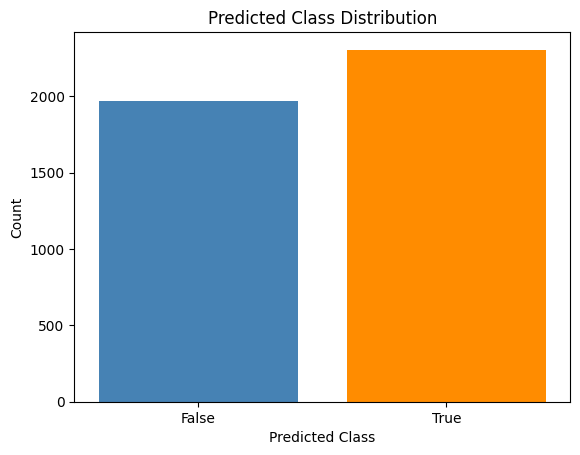

In [ ]:
# Get the predicted values
predictions = reloaded_model.predict(abt_test)

# Count the occurrences of each class
class_counts = sns.countplot(x=predictions)

# Customize the plot
class_counts.set(xticklabels=['False', 'True'])
class_counts.set_xlabel('Predicted Class')
class_counts.set_ylabel('Count')
class_counts.set_title('Predicted Class Distribution')

# Apply colors to the bars
colors = ['steelblue', 'darkorange']
for i, patch in enumerate(class_counts.patches):
    patch.set_facecolor(colors[i % len(colors)])

# Show the plot
plt.show()

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': y_hat}) # Changiong column name in preferatble name for the Kaggle competition

In [ ]:
submission['Transported'] = submission['Transported'].map({1:True , 0:False}) # Mapping Model's Prediction 1 to True & 0 to False

In [ ]:
first_submission = submission.copy() # Deep Copy

# Sumbitting submission to kaggle!

In [ ]:
first_submission.to_csv('kaggle_submission.csv', index = False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -m "Gb Model" -f "kaggle_submission.csv"

100% 56.2k/56.2k [00:00<00:00, 131kB/s]
Successfully submitted to Spaceship Titanic

#         **Submission** **Sucsess**



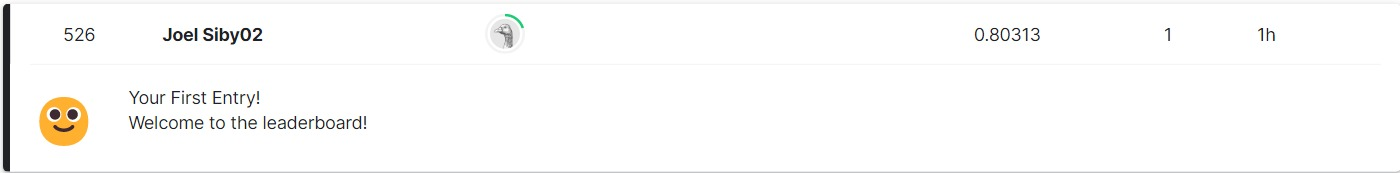